### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 6)
sns.set_theme(style="whitegrid")


### Load the Dataset

In [6]:
df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep="|") 
df.head()

/tmp/ipykernel_13354/1510927227.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/MachineLearningRating_v3.txt', sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### Data Summary

In [7]:
df.describe()

df.dtypes

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

### Data Quality Checks

In [8]:
missing = df.isnull().sum()
missing[missing > 0]

df.duplicated().sum()


np.int64(0)

### Univariate Analysis

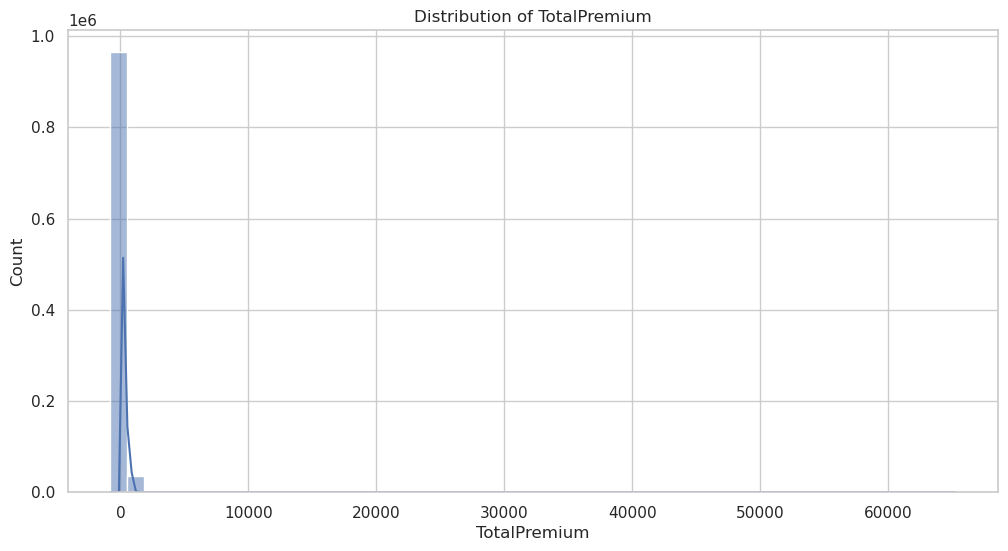

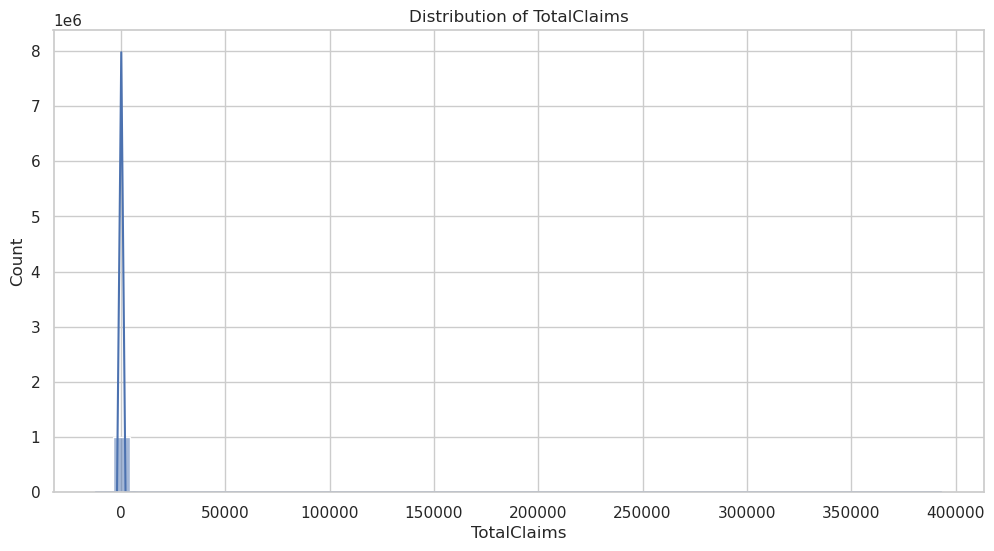

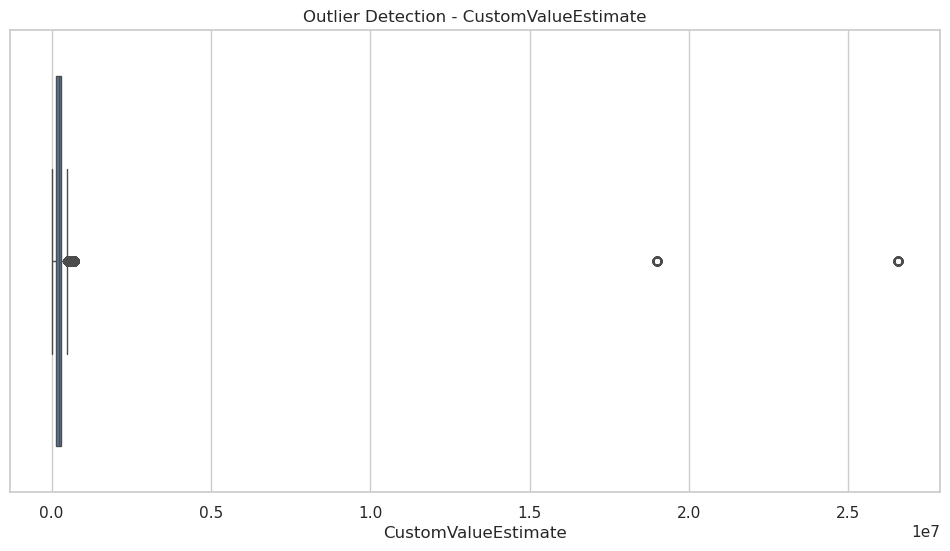

In [10]:
sns.histplot(df['TotalPremium'], bins=50, kde=True)
plt.title('Distribution of TotalPremium')
plt.show()

sns.histplot(df['TotalClaims'], bins=50, kde=True)
plt.title('Distribution of TotalClaims')
plt.show()

sns.boxplot(x=df['CustomValueEstimate'])
plt.title('Outlier Detection - CustomValueEstimate')
plt.show()


### Bivariate/Multivariate Analysis

#### Loss Ratio by Gender

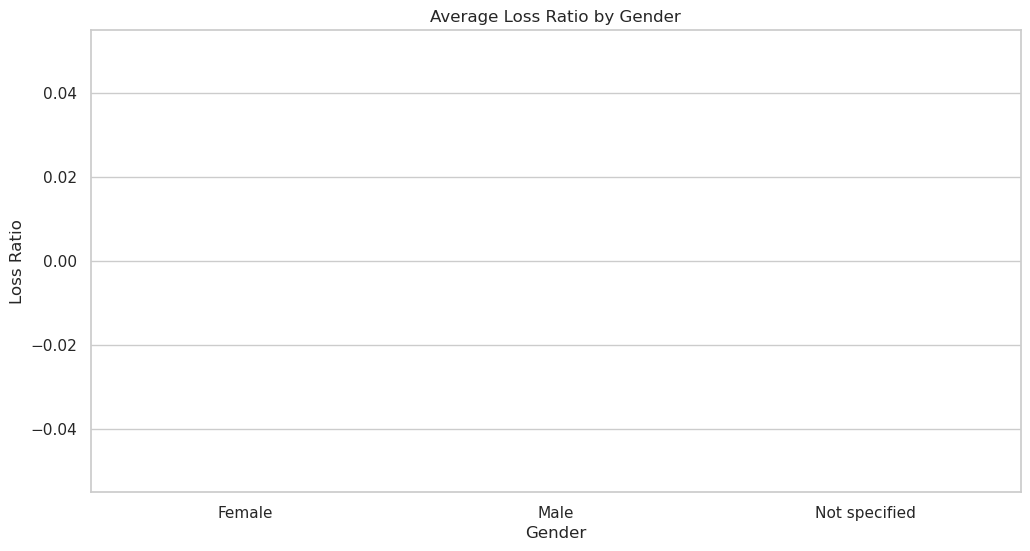

In [12]:
gender_loss = df.groupby('Gender')['LossRatio'].mean()
sns.barplot(x=gender_loss.index, y=gender_loss.values)
plt.title('Average Loss Ratio by Gender')
plt.ylabel('Loss Ratio')
plt.show()

#### Vehicle type Impact

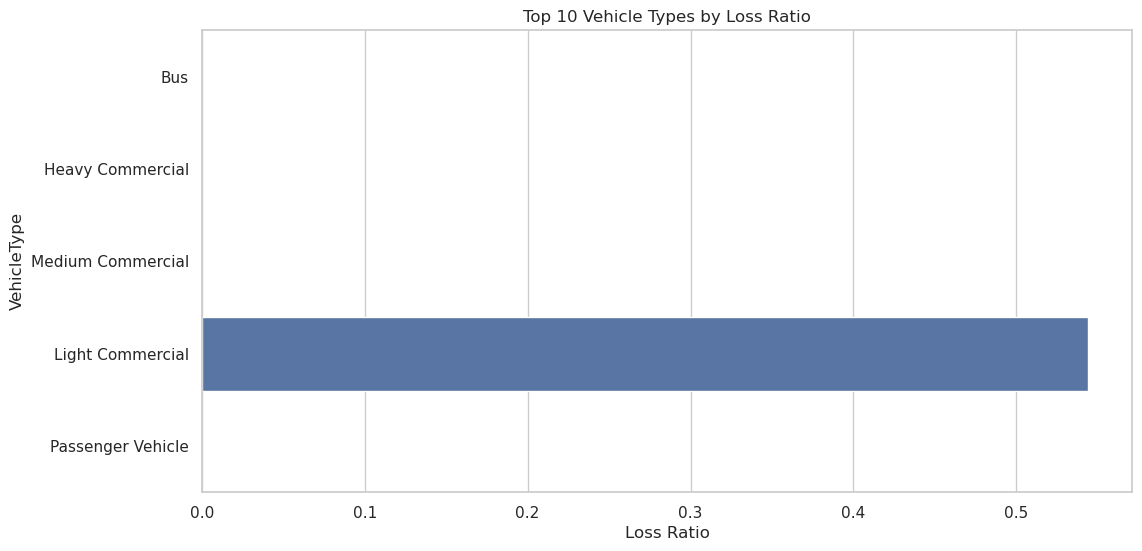

In [14]:
vehicle_loss = df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False).head(10)
vehicle_loss = df.groupby('VehicleType')['LossRatio'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=vehicle_loss.values, y=vehicle_loss.index)
plt.title('Top 10 Vehicle Types by Loss Ratio')
plt.xlabel('Loss Ratio')
plt.show()

### Temporal Analysis

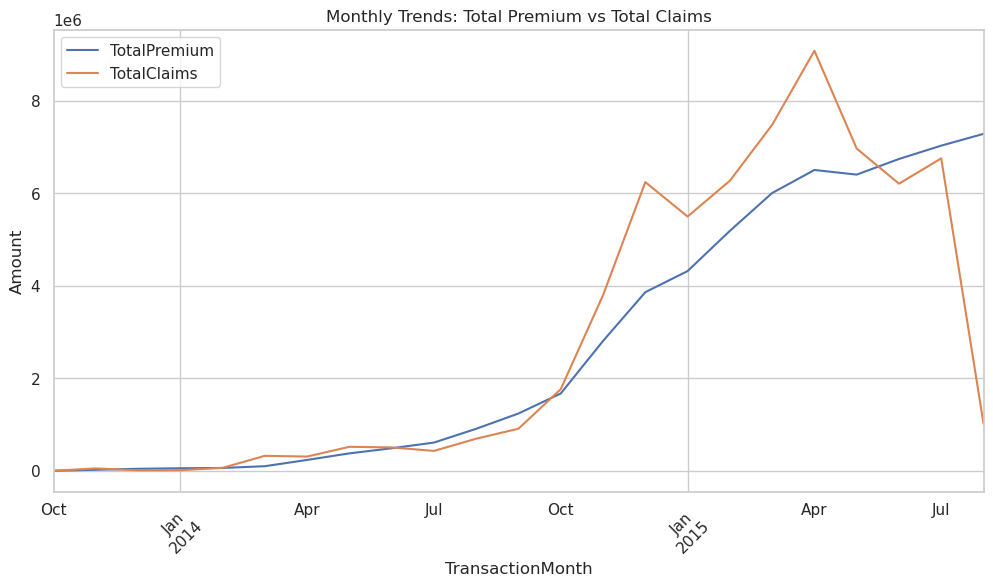

In [15]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period("M"))[['TotalPremium', 'TotalClaims']].sum()

monthly.plot()
plt.title('Monthly Trends: Total Premium vs Total Claims')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

### High/Low Claim Vehicle Models

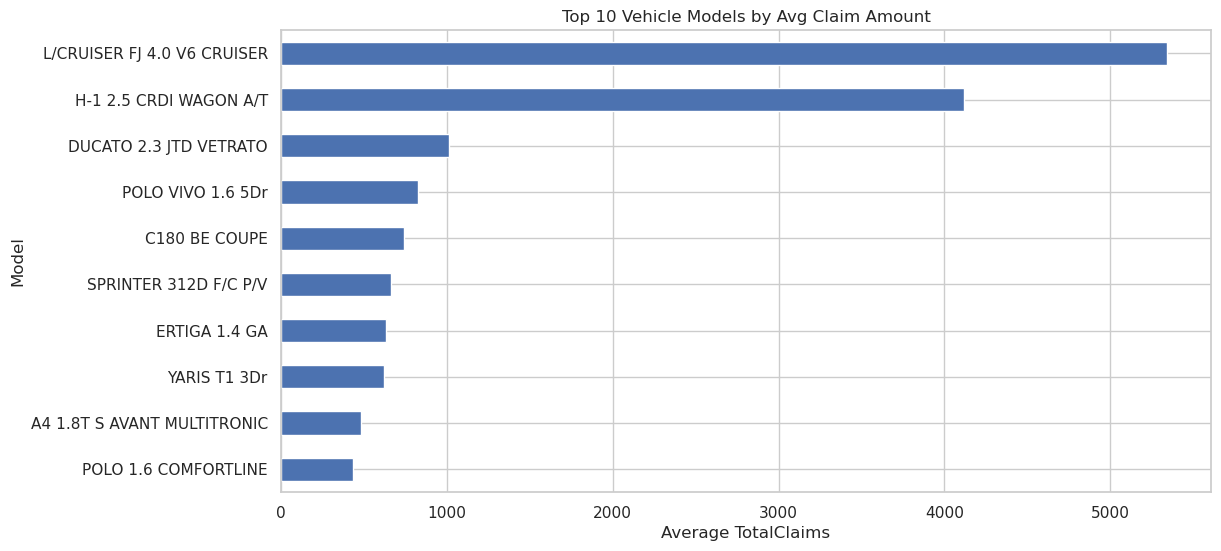

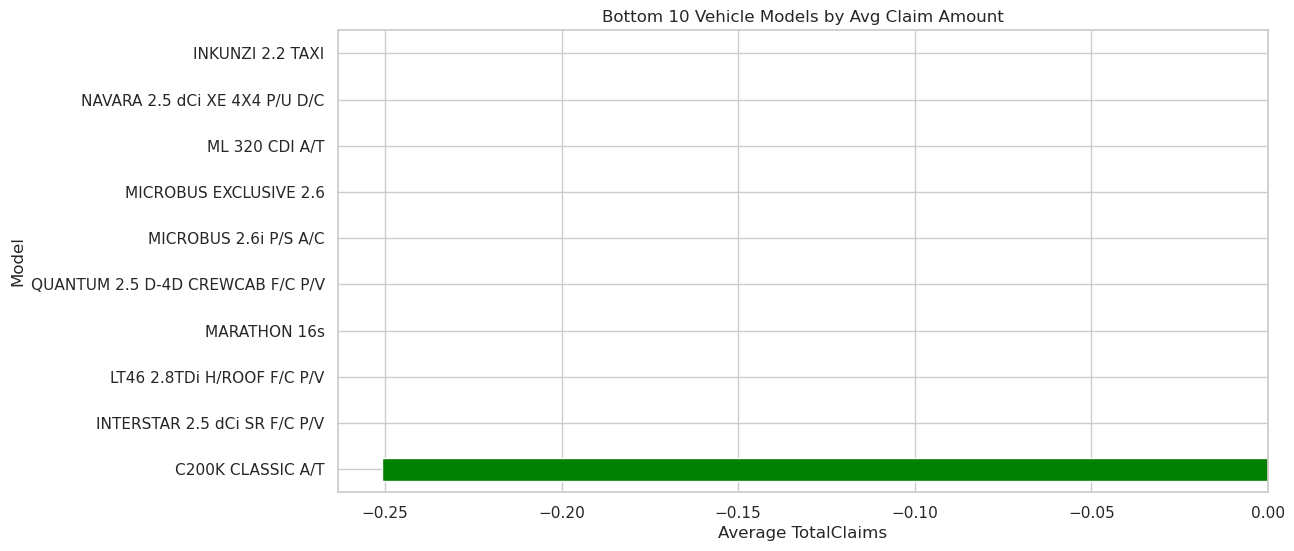

In [16]:
model_claims = df.groupby('Model')['TotalClaims'].mean().sort_values()
top = model_claims.tail(10)
bottom = model_claims.head(10)

# Top 10 Models
top.plot(kind='barh')
plt.title('Top 10 Vehicle Models by Avg Claim Amount')
plt.xlabel('Average TotalClaims')
plt.show()

# Bottom 10 Models
bottom.plot(kind='barh', color='green')
plt.title('Bottom 10 Vehicle Models by Avg Claim Amount')
plt.xlabel('Average TotalClaims')
plt.show()

### Heatmap of LossRation by Zipcode and Province

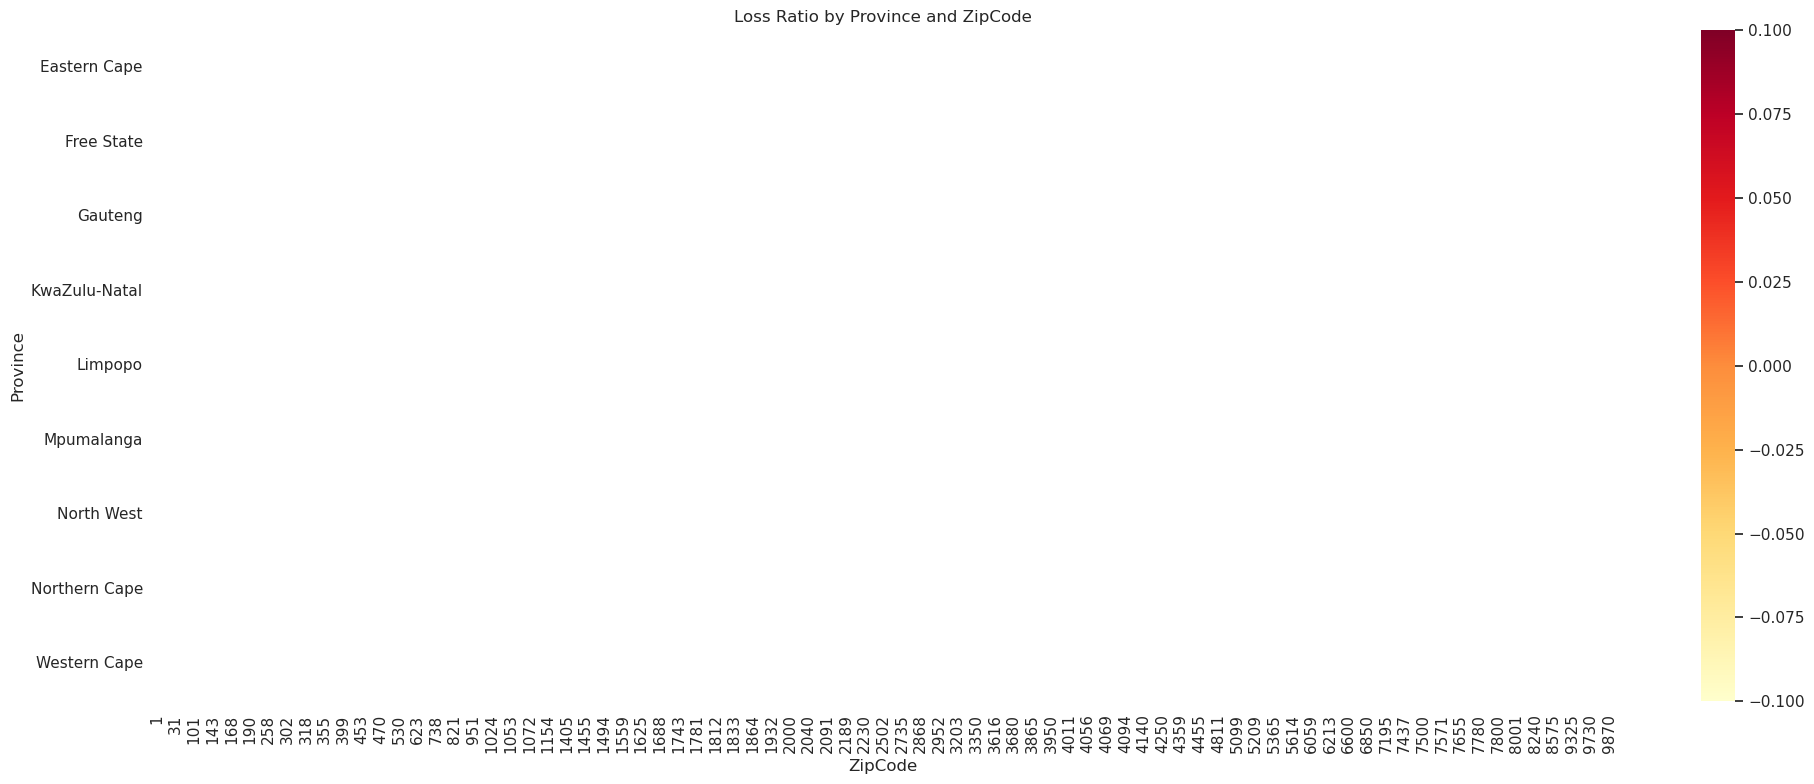

In [18]:
# Group by ZipCode and Province
loss_geo = df.groupby(['Province', 'PostalCode'])[['TotalClaims', 'TotalPremium']].sum().reset_index()
loss_geo['LossRatio'] = loss_geo['TotalClaims'] / loss_geo['TotalPremium']

# Pivot for heatmap
heatmap_data = loss_geo.pivot_table(index='Province', columns='PostalCode', values='LossRatio')

# Plot
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linecolor='white', linewidths=0.1)
plt.title('Loss Ratio by Province and ZipCode')
plt.xlabel('ZipCode')
plt.ylabel('Province')
plt.tight_layout()
plt.savefig('../visuals/heatmap_lossratio_province_zipcode.png')
plt.show()

### CustomValueEstimate vs TotalPremium Colored by Gender

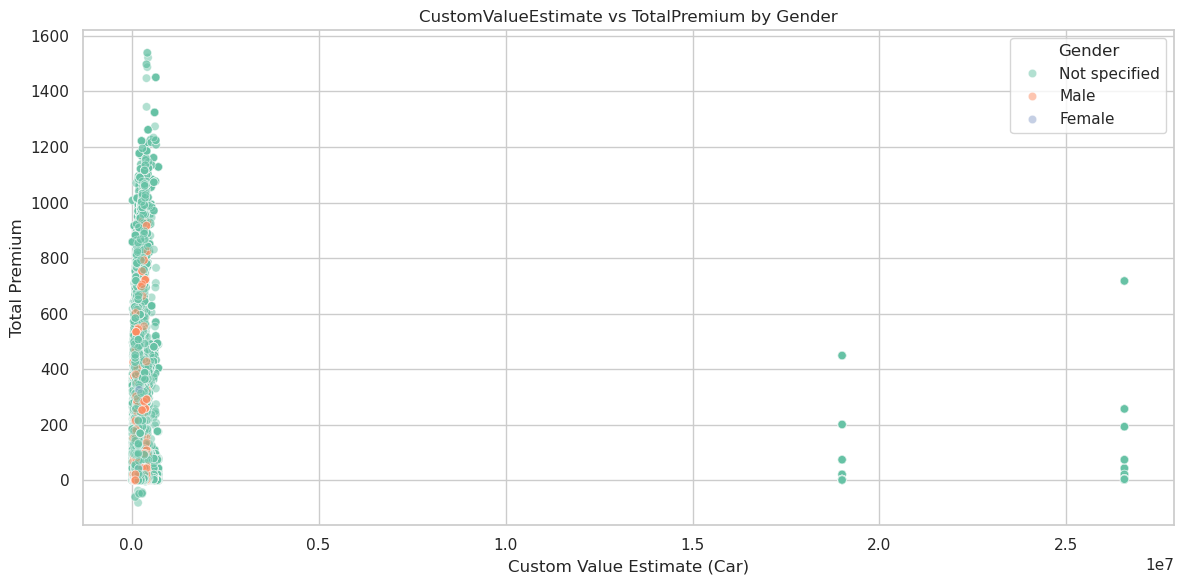

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='CustomValueEstimate',
    y='TotalPremium',
    hue='Gender',
    alpha=0.5,
    palette='Set2'
)
plt.title('CustomValueEstimate vs TotalPremium by Gender')
plt.xlabel('Custom Value Estimate (Car)')
plt.ylabel('Total Premium')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('../visuals/scatter_customvalue_premium_gender.png')
plt.show()


In [17]:
plt.savefig("../visuals/loss_ratio_province.png")

<Figure size 1200x600 with 0 Axes>